In [129]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.signal.invsim import corn_freq_2_paz
from obspy.signal.invsim import paz_to_freq_resp

In [130]:
#fixed corner Period, fixed Damping

Tc=120
damp=.707
fc=2*np.pi/Tc
p11=-damp
p12=np.sqrt(1-damp**2)
p1p=complex (p11,p12)
p1m=np.conj(p1p)
print (fc*p1p,fc*p1m)

(-0.03701843343479973+0.037029614690321566j) (-0.03701843343479973-0.037029614690321566j)


In [125]:
#Expolore effect of various degrees of damping

p1p=np.zeros(10, dtype=complex)
p1m=np.zeros(10, dtype=complex)
Tc=120
fc=2*np.pi/Tc
damp=.1
for i in range (1,10):
    d=damp*i
    p11=-d
    print (i,p11)
    p12=np.sqrt(1-d**2)
    pp=complex (p11,p12)
    p1p[i]=fc*pp
    pm=np.conj(pp)
    p1m[i]=fc*pm
    print (p11*-1,p1p[i],p1m[i])

1 -0.1
0.1 (-0.005235987755982989+0.052097420380471555j) (-0.005235987755982989-0.052097420380471555j)
2 -0.2
0.2 (-0.010471975511965978+0.05130199320647456j) (-0.010471975511965978-0.05130199320647456j)
3 -0.30000000000000004
0.30000000000000004 (-0.015707963267948967+0.04994813978571317j) (-0.015707963267948967-0.04994813978571317j)
4 -0.4
0.4 (-0.020943951023931956+0.047988620459308025j) (-0.020943951023931956-0.047988620459308025j)
5 -0.5
0.5 (-0.02617993877991494+0.04534498410585544j) (-0.02617993877991494-0.04534498410585544j)
6 -0.6000000000000001
0.6000000000000001 (-0.031415926535897934+0.041887902047863905j) (-0.031415926535897934-0.041887902047863905j)
7 -0.7000000000000001
0.7000000000000001 (-0.03665191429188092+0.03739243181207919j) (-0.03665191429188092-0.03739243181207919j)
8 -0.8
0.8 (-0.04188790204786391+0.03141592653589792j) (-0.04188790204786391-0.03141592653589792j)
9 -0.9
0.9 (-0.047123889803846894+0.022823141497946144j) (-0.047123889803846894-0.022823141497946144

In [131]:
#Expolore effect of various corner periods (Range 90-140sec)

p1p=np.zeros(12, dtype=complex)
p1m=np.zeros(12, dtype=complex)

damp=.707
p11=-damp
p12=np.sqrt(1-damp**2)
pp=complex (p11,p12)

Tc=85

for i in range (1,12):
    Tc=Tc+5
    fc=2*np.pi/Tc
    p1p[i]=fc*pp
    pm=np.conj(pp)
    p1m[i]=fc*pm
    print (Tc,p1p[i],p1m[i])

90 (-0.049357911246399634+0.049372819587095426j) (-0.049357911246399634-0.049372819587095426j)
95 (-0.04676012644395756+0.04677425013514304j) (-0.04676012644395756-0.04677425013514304j)
100 (-0.044422120121759674+0.04443553762838589j) (-0.044422120121759674-0.04443553762838589j)
105 (-0.04230678106834255+0.04231955964608179j) (-0.04230678106834255-0.04231955964608179j)
110 (-0.040383745565236065+0.04039594329853262j) (-0.040383745565236065-0.04039594329853262j)
115 (-0.038627930540660584+0.03863959793772686j) (-0.038627930540660584-0.03863959793772686j)
120 (-0.03701843343479973+0.037029614690321566j) (-0.03701843343479973-0.037029614690321566j)
125 (-0.03553769609740774+0.03554843010270871j) (-0.03553769609740774-0.03554843010270871j)
130 (-0.03417086163212282+0.034181182791066064j) (-0.03417086163212282-0.034181182791066064j)
135 (-0.032905274164266425+0.032915213058063615j) (-0.032905274164266425-0.032915213058063615j)
140 (-0.031730085801256906+0.03173966973456135j) (-0.03173008580

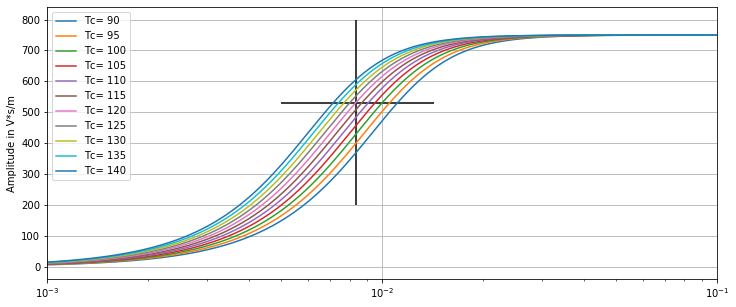

Wall time: 10.1 s


In [135]:
%%time

#plot either various damping or various corner periods
#when plotting damping make i in range (1,10)
#when plotting corner periods make i in range (1,12)

sens=750
normfact=5.46606E12
x=10**(3/20)
val3db=sens/x
scale_fac = normfact*sens

d=["Tc= 90","Tc= 95","Tc= 100","Tc= 105","Tc= 110","Tc= 115","Tc= 120","Tc= 125", "Tc= 130","Tc= 135","Tc= 140"]
#d=["Damping= .1","Damping= .2","Damping= .3","Damping= .4","Damping= .5","Damping= .6","Damping= .7","Damping= .8", "Damping= .8"]
zeros=[0,0]

plt.rcParams['figure.figsize'] = [12, 5]
plt.figure()

for i in range (1,12):
    poles = [p1p[i],p1m[i],p2p,p2m,p3p,p3m]
    #poles = [p1p[i],p1m[i]]
    h, f = paz_to_freq_resp(poles, zeros, scale_fac, 0.22, 67072*64, freq=True)
    plt.semilogx(f, (abs(h)),label=d[i-1])
    
    
#plt.loglog (f, (abs(h)),label="factory")
plt.xlim(.001,.1)
plt.ylabel('Amplitude in V*s/m')
plt.grid (which='major')
plt.vlines(1/120,200,800,colors='black')
plt.hlines(val3db,1/200,1/70,colors='black')
plt.legend(loc='upper left')
plt.show()             

In [ ]:
#obspy original module corn_freq_2_paz (not used here)

Tc=120
fc=1/Tc
#print (np.pi,fc)
damp=.707
p = corn_freq_2_paz (fc,damp)
print (p)